### conceito

Uma árvore de decisão começa com o **root node**, que é onde ocorrerá a primeira divisão. Abaixo do root node estão os **internal nodes**, que são resultados das divisões anteriores e dão resultado a novas divisões. No fim da árvore estão os **leaf nodes**, onde são decididos a qual label o dado que passa pela árvore pertencerá. Quando um leaf node não possui 100% dos exemplos em apenas uma categoria, são chamados de impuros. Para determinar qual separação é melhor em cada ponto da árvore utilizam-se métodos para mensurar e comparar a impuridade das divisões:

**Gini** é uma medida comumente usada para calcular desigualdade, mas na árvore de decisão indica impureza. Um nó é 'puro' quando o Gini é 0, isto é, se todas as instâncias na folha pertencerem a mesma classe.

**Entropia** é uma medida comumente usada para indicar a desordem, mas na árvore de decisão indica a incerteza associada aos dados. Se todos os pontos de dados pertencem a uma só classe, não há incerteza real, então há baixa entropia. O contrário ocorre se os pontos estão distribuídos de forma homogênea entre as classes.

Na maioria das vezes, não há muita diferença em usar Gini ou Entropia, pois as duas medidas levam a árvores semelhantes. Por padrão, o Gini é mais rápido para calcular.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from sklearn import datasets

# importar dataset
iris = datasets.load_iris()

# divisão entre variáveis explicativas e target
X = iris.data[:, [2, 3]]
y = iris.target

In [2]:
from sklearn.tree import DecisionTreeClassifier

# rodar algoritmo
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

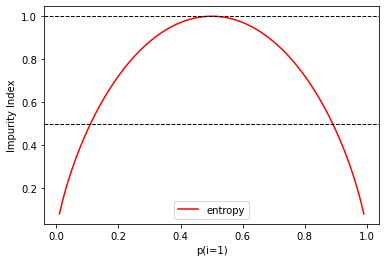

In [3]:
# pelo gráfico, nota-se que a entropia é baixa quando todos os pi estão próximos de 0 ou 1, ou seja, quando a maioria dos dados está em uma só classe

def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2(1 - p)

x = np.arange(0.0, 1.0, 0.01)

e = [entropy(p) if p != 0 else None for p in x]

# gráico da impureza:

plt.plot(x, e, label='entropy', color='r') 

for y in [0.5, 1.0]:
    plt.axhline(y=y, linewidth=1, color='k', linestyle='--')

plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.legend()
plt.show()

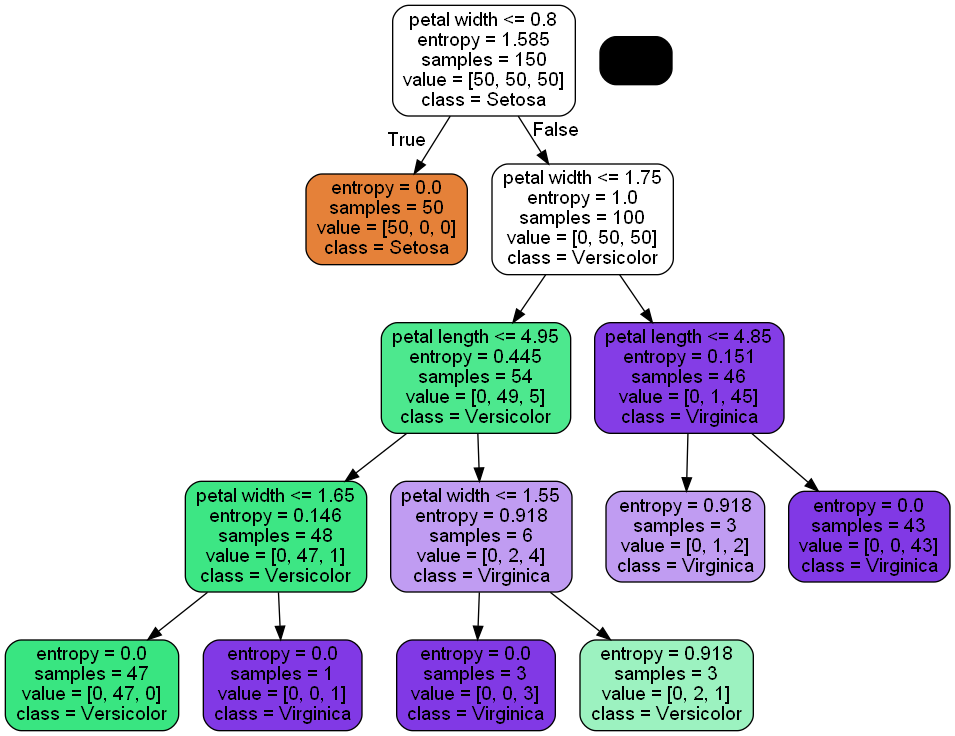

In [4]:
# visualização da árvore

from pydotplus.graphviz import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, filled=True, rounded=True, class_names=['Setosa', 'Versicolor','Virginica'], 
                           feature_names=['petal length', 'petal width'], out_file=None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')  

from IPython.display import Image
Image("./tree.png")